# PCA
Only group filtering but no TIC normalization

In [15]:
library(glue)

In [16]:
exp_label = "postGroupFilt"

In [17]:
input_matrix_name = "../../output/preproc_fultab_lab_targlist_79_rmTn750K/groupFil0.3_RPneg_blkM_featab.csv"
meta_data_name = "../../../seq/RPneg_addgrp.csv"

In [18]:
rn = sample(1:100, 1)
output_dir <- glue("../../output/preproc_fultab_lab_targlist_79_rmTn750K/PCA/postGrpFilt_{rn}")
dir.create(output_dir)

In [19]:
df = read.table(input_matrix_name, header = TRUE,sep = ',',row.name = 1)
meta_df = read.table(meta_data_name, header = TRUE, sep = ',')

In [20]:
head(df)

,mz,rtime,rtime_left_base,rtime_right_base,parent_masstrack_id,peak_area,cSelectivity,goodness_fitting,snr,detection_counts,⋯,CD8stem_250K_1,CD8stem_300K_2,pooled_2,CD8trans_350K_1,CD8trans_250K_2,CD8TD_750K_1,CD8TD_750K_2,pooled_3,Qstd_3,Blank_3
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
F2,400.0653,21.40,20.14,23.94,1,35287713,1.00,0.95,3317,11,⋯,1027433,2591103,3259847,1778230,NA,1093155,7938840,3717405,NA,NA
F4,435.1144,117.56,114.91,119.96,563,19862141,1.00,0.91,40,11,⋯,1769503,1820261,1966062,2140897,1946997,NA,2309285,2216140,NA,NA
F5,435.1205,23.94,22.65,25.25,564,7169486,0.83,0.96,850,9,⋯,789810,920317,924456,829886,NA,NA,746458,826633,NA,NA
F6,435.1205,29.40,26.78,32.02,564,21589571,0.96,0.85,1357,9,⋯,1492999,1951666,2219035,2146985,NA,NA,1616575,2157561,NA,NA
F10,400.1695,302.55,301.31,303.58,2,1137374,0.45,0.83,11,9,⋯,130387,NA,NA,NA,122843,NA,NA,109682,NA,125634
F11,400.1695,305.64,303.58,307.50,2,3695386,0.30,0.94,19,10,⋯,428391,NA,284946,NA,330784,NA,NA,109705,NA,317547


In [21]:
head(meta_df)

,Sample.Type,File.Name,Sample.ID,Sample_ID_upd,cell_number,group,Comment,Path,Instrument.Method,Process.Method,Position,Inj.Vol
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<lgl>,<chr>,<int>
1,Blank,Blank_20230308_002,Blank_20230308_002,Blank_1,NR,Blank,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:A1,2
2,Blank,Blank_20230308_004,Blank_20230308_004,Blank_2,NR,Blank,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:A1,2
3,Blank,Blank_std_20230308_1_002,Blank_std_20230308_002,Blank_std_1,NR,Blank_std,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:A2,2
4,QC,MT_20230308_002,Qstd_20230308_002,Qstd_1,NR,Qstd,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:A3,2
5,QC,MT_20230308_004,Qstd_20230308_004,Qstd_2,NR,Qstd,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:A3,2
6,Unknown,MT_20230308_006,pooledsample_02,pooled_1,NA,pooled,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:A4,5


In [22]:
rownames(meta_df) = meta_df$Sample_ID_upd

In [23]:
unique(meta_df$group)

[1] "Blank"     "Blank_std" "Qstd"      "pooled"    "Tn"        "CD8stem"  
[7] "CD8trans"  "CD8TD"

In [24]:
data.df = df[,grep('pooled\\_[0-9]+|CD8stem\\_[0-9]+|CD8TD\\_[0-9]+|CD8trans\\_[0-9]+|Tn\\_[0-9]+',colnames(df))]

In [25]:
if(any(data.df[!is.na(data.df)] > 10000)) {
    data.df[data.df == 0] = NA
    data.df.log2 = log2(data.df)
} else {
    data.df.log2 = data.df
}

In [26]:
head(data.df.log2)

,pooled_1,Tn_250K_1,Tn_250K_2,CD8stem_250K_1,CD8stem_300K_2,pooled_2,CD8trans_350K_1,CD8trans_250K_2,CD8TD_750K_1,CD8TD_750K_2,pooled_3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
F2,21.69317,NA,15.88169,19.97061,21.30513,21.63637,20.76201,NA,20.06007,22.92050,21.82586
F4,20.47444,20.43721,20.92927,20.75491,20.79571,20.90688,21.02978,20.89282,NA,21.13901,21.07962
F5,19.04368,NA,NA,19.59115,19.81177,19.81825,19.66255,NA,NA,19.50970,19.65689
F6,21.09269,NA,NA,20.50978,20.89627,21.08150,21.03388,NA,NA,20.62451,21.04097
F10,17.88459,16.68275,16.91734,16.99244,NA,NA,NA,16.90646,NA,NA,16.74297
F11,18.93748,17.67958,19.49629,18.70857,NA,18.12033,NA,18.33553,NA,NA,16.74327


In [27]:
sub_meta_df = meta_df[colnames(data.df.log2),]

In [28]:
sub_meta_df

,Sample.Type,File.Name,Sample.ID,Sample_ID_upd,cell_number,group,Comment,Path,Instrument.Method,Process.Method,Position,Inj.Vol
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<lgl>,<chr>,<int>
pooled_1,Unknown,MT_20230308_006,pooledsample_02,pooled_1,NA,pooled,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:A4,5
Tn_250K_1,Unknown,MT_20230308_008,Naive_250k_01_02,Tn_250K_1,250000,Tn,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:B1,5
Tn_250K_2,Unknown,MT_20230308_010,Naive_250k_02_02,Tn_250K_2,250000,Tn,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:B2,5
CD8stem_250K_1,Unknown,MT_20230308_016,CD8T_stem_250k_01_02,CD8stem_250K_1,250000,CD8stem,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:B5,5
CD8stem_300K_2,Unknown,MT_20230308_018,CD8T_stem_300k_01_02,CD8stem_300K_2,300000,CD8stem,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:B6,5
pooled_2,Unknown,MT_20230308_020,pooledsample_04,pooled_2,NA,pooled,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:A4,5
CD8trans_350K_1,Unknown,MT_20230308_022,CD8T_trans_350k_01_02,CD8trans_350K_1,350000,CD8trans,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:B7,5
CD8trans_250K_2,Unknown,MT_20230308_024,CD8T_trans_250k_01_02,CD8trans_250K_2,250000,CD8trans,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:B8,5
CD8TD_750K_1,Unknown,MT_20230308_026,CD8T_TD_750k_01_02,CD8TD_750K_1,750000,CD8TD,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:B9,5


In [29]:
library(stringr)
ordered_group_v = str_extract(colnames(data.df.log2),'pooled|Tn|CD8stem|CD8trans|CD8TD')

In [30]:
color_v = c('pooled' = "#888888", 
            'Tn' = "#008000",
            'CD8stem' = '#0000ff',
            'CD8trans' = '#00fff0',
            'CD8TD' = '#ff0000')[ordered_group_v]

In [31]:
color_v

pooled        Tn        Tn   CD8stem   CD8stem    pooled  CD8trans  CD8trans 
"#888888" "#008000" "#008000" "#0000ff" "#0000ff" "#888888" "#00fff0" "#00fff0" 
    CD8TD     CD8TD    pooled 
"#ff0000" "#ff0000" "#888888"

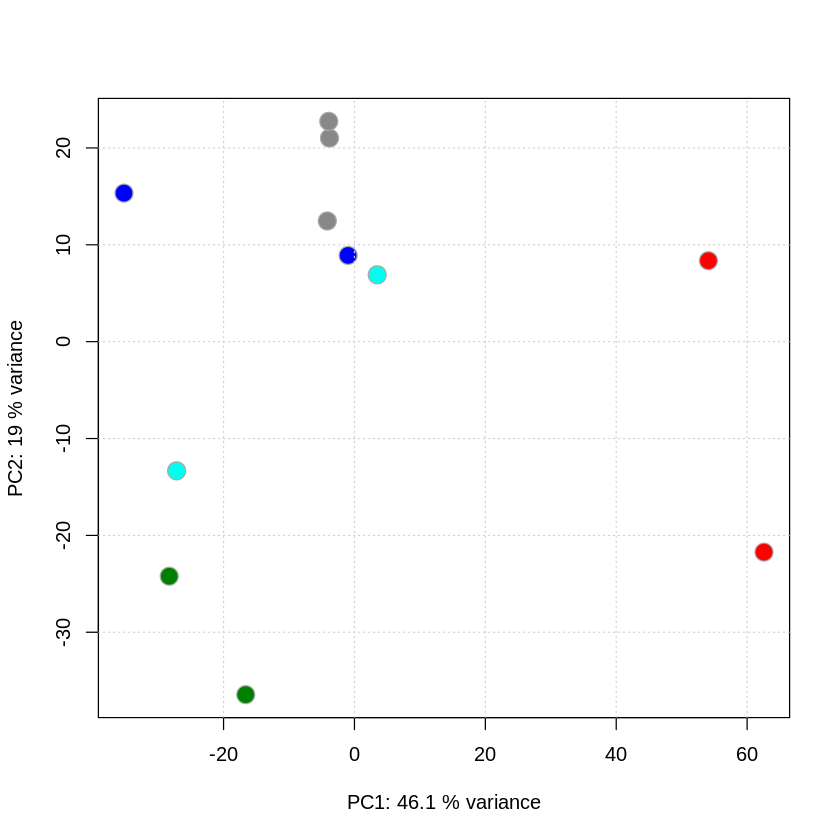

In [32]:
#' Perform the PCA omitting all features with an NA in any of the
pc <- prcomp(t(na.omit(data.df.log2)), center = TRUE) 

#' Plot the PCA
pcSummary <- summary(pc)
plot(pc$x[, 1], pc$x[,2], pch = 21, main = "",
     xlab = paste0("PC1: ", format(pcSummary$importance[2, 1] * 100,
                                   digits = 3), " % variance"),
     ylab = paste0("PC2: ", format(pcSummary$importance[2, 2] * 100,
                                   digits = 3), " % variance"),
     col = "darkgrey", bg = color_v, cex = 2)
     grid()
    # text(pc$x[, 1], pc$x[,2],  col = "darkgrey", labels = colnames(data.df.log2)
    # pos = 3, cex = 2)

In [33]:
# print the pdf
pdf(file.path(output_dir,glue("{exp_label}_omit_featureswtNA_PCA_wt_labels.pdf")))
#' Perform the PCA omitting all features with an NA in any of the
pc <- prcomp(t(na.omit(data.df.log2)), center = TRUE) 

#' Plot the PCA
pcSummary <- summary(pc)
plot(pc$x[, 1], pc$x[,2], pch = 21, main = "",
     xlab = paste0("PC1: ", format(pcSummary$importance[2, 1] * 100,
                                   digits = 3), " % variance"),
     ylab = paste0("PC2: ", format(pcSummary$importance[2, 2] * 100,
                                   digits = 3), " % variance"),
     text(pc$x[, 1], pc$x[,2],  col = "darkgrey", labels = colnames(data.df.log2),
     pos = 3, cex = 1),
     col = "darkgrey", bg = color_v, cex = 2)
     grid()
     
dev.off()

png 
  2

-----

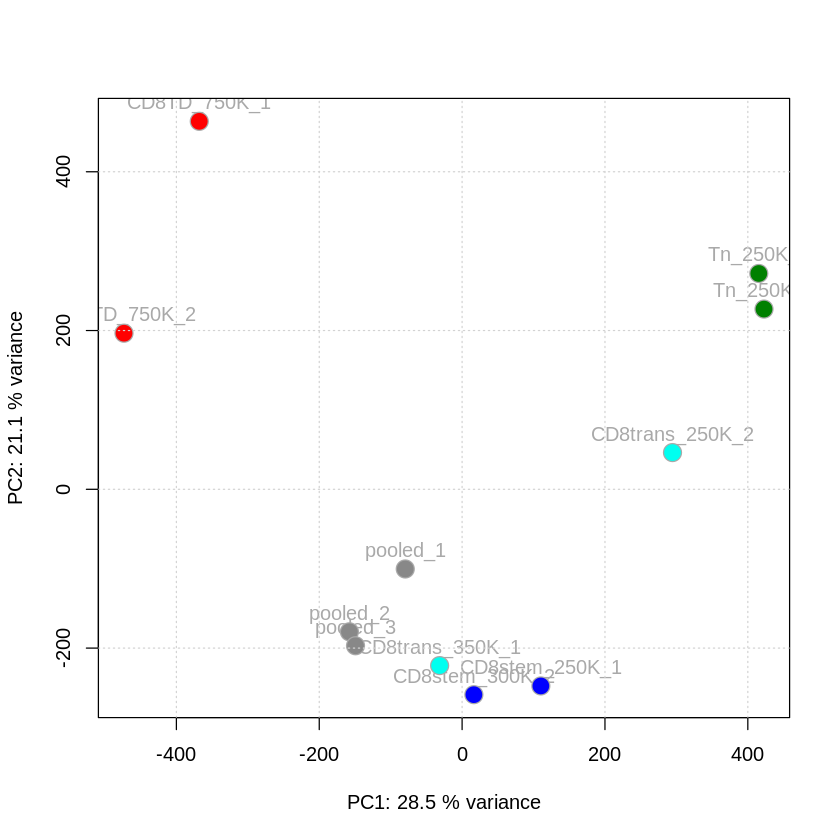

In [34]:
#' Perform the PCA omitting all features with an NA in any of the
data.df.log2.zero = data.df.log2
data.df.log2.zero[is.na(data.df.log2.zero)] = 0
pc <- prcomp(t(data.df.log2.zero), center = TRUE) 

#' Plot the PCA
pcSummary <- summary(pc)
plot(pc$x[, 1], pc$x[,2], pch = 21, main = "",
     xlab = paste0("PC1: ", format(pcSummary$importance[2, 1] * 100,
                                   digits = 3), " % variance"),
     ylab = paste0("PC2: ", format(pcSummary$importance[2, 2] * 100,
                                   digits = 3), " % variance"),
     text(pc$x[, 1], pc$x[,2],  col = "darkgrey", labels = colnames(data.df.log2),
     pos = 3, cex = 1),
     col = "darkgrey", bg = color_v, cex = 2)
     grid()
     

In [35]:
#' Perform the PCA omitting all features with an NA in any of the
data.df.log2.zero = data.df.log2
data.df.log2.zero[is.na(data.df.log2.zero)] = 0

pdf(file.path(output_dir,glue("{exp_label}_keepZero_in_PCA_decomp_wt_labels.pdf")))
pc <- prcomp(t(data.df.log2.zero), center = TRUE) 

#' Plot the PCA
pcSummary <- summary(pc)
plot(pc$x[, 1], pc$x[,2], pch = 21, main = "",
     xlab = paste0("PC1: ", format(pcSummary$importance[2, 1] * 100,
                                   digits = 3), " % variance"),
     ylab = paste0("PC2: ", format(pcSummary$importance[2, 2] * 100,
                                   digits = 3), " % variance"),
     text(pc$x[, 1], pc$x[,2],  col = "darkgrey", labels = colnames(data.df.log2),
     pos = 3, cex = 1),
     col = "darkgrey", bg = color_v, cex = 2)
     grid()
     
dev.off()

png 
  2